#### Topic - Feature Engineering - Transformations
- Why do we need to do a log transformation?
  - Algorithms like linear regression and logistic regression assumes normal distribution and also assumes linear relationship between the dependent and independent variable
  - Also in general whatever be the algorithm we use, if is better to transform the skewed data. Let's take an example to understand this - If we have a housing prize dataset then there is possibility for a large number of outliers in the dataset the median value might be on the lower to middle end but it could have a lot of outliers So in these case when we train the model using untransformed data then the model would have been trained on a large number of low to moderately priced homes hence might not be good in predicting the expensives homes

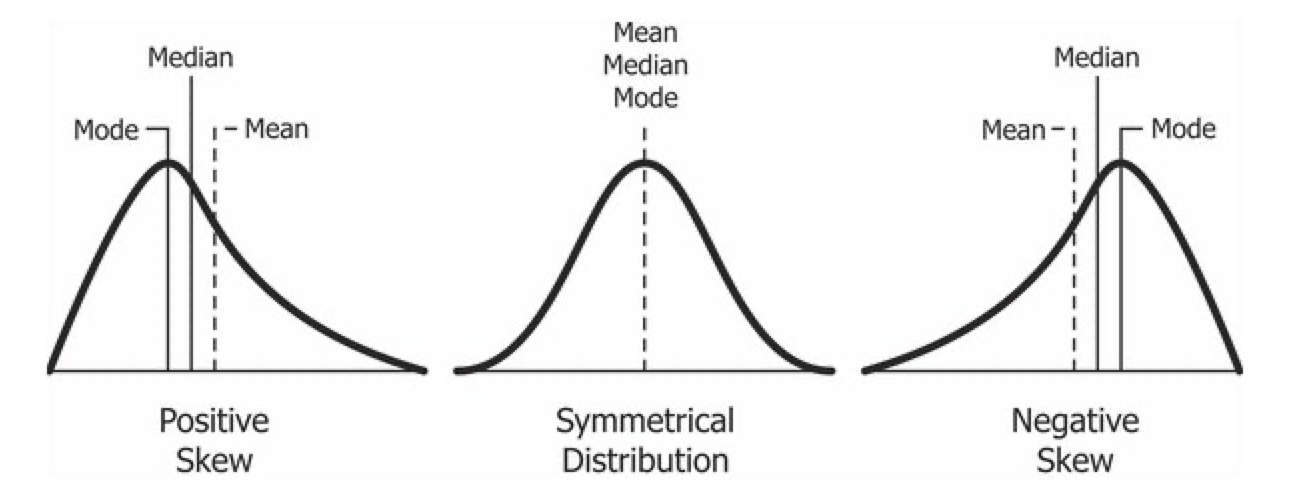

Image Source: https://www.quora.com/What-does-SKEWED-DISTRIBUTION-mean


- Log Transformation - We replace the vaiable with its log value
- Log Transformation can be used when 
  - When the data have some outliers and we would want to retain     them in the model
  - When the data is skewed to its right or in other words the long tail is on the right
- Where we can't use log transformation?
  - When the data has zero or negative values
- What are some replacements for log transformation?
  - Inverse, square root trnasformation and may be name few more.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../Data/Titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = train[['Age', 'Fare']]
data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


<AxesSubplot:>

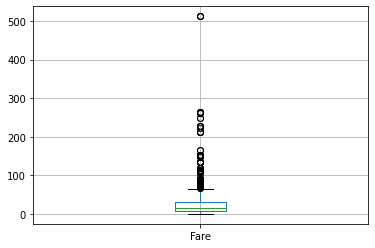

In [4]:
data.boxplot(column = "Fare")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

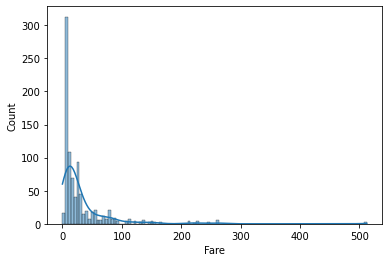

In [5]:
sns.histplot(data['Fare'], kde= True)

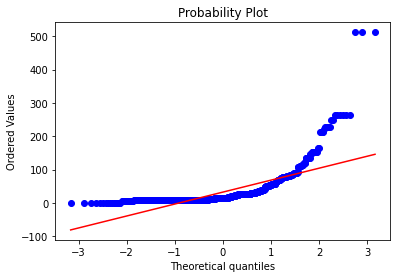

In [6]:
# QQ Plot
# Quantile - Quantile plot is a graphical plot to check if 
# the data is distributed normally
plt.subplot()
stats.probplot(data['Fare'], plot=sns.mpl.pyplot)
plt.show()

In [7]:
data_log = np.log(data + 1)
data_log.head()

,Age,Fare
0,3.135494,2.110213
1,3.663562,4.280593
2,3.295837,2.188856
3,3.583519,3.990834
4,3.583519,2.202765


<AxesSubplot:xlabel='Fare', ylabel='Count'>

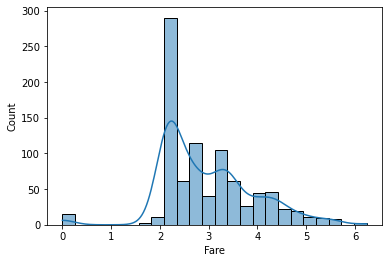

In [8]:
sns.histplot(data_log['Fare'], kde = True)

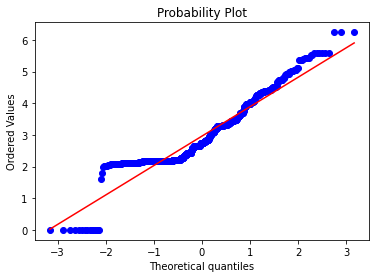

In [9]:
# QQ Plot
# Quantile - Quantile plot is a graphical plot to check if 
# the data is distributed normally
plt.subplot()
stats.probplot(data_log['Fare'], plot=sns.mpl.pyplot)
plt.show()

<AxesSubplot:>

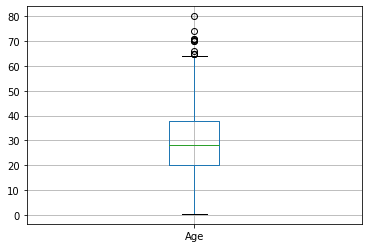

In [10]:
data.boxplot(column = "Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

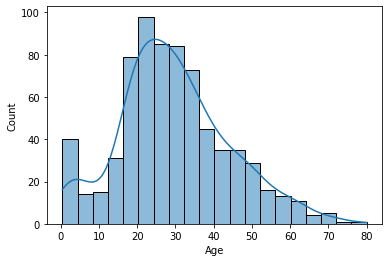

In [11]:
sns.histplot(data['Age'], kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

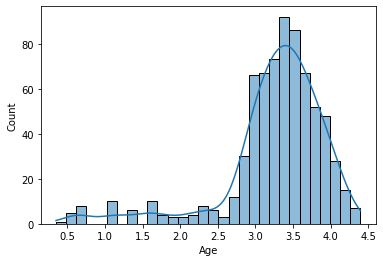

In [12]:
sns.histplot(data_log['Age'], kde = True)

In [13]:
data_sqrt = np.sqrt(data + 1)
data_sqrt.head()

,Age,Fare
0,4.795832,2.872281
1,6.244998,8.501959
2,5.196152,2.987474
3,6.000000,7.355270
4,6.000000,3.008322


<AxesSubplot:xlabel='Fare', ylabel='Count'>

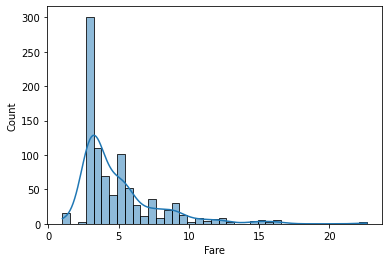

In [14]:
sns.histplot(data_sqrt['Fare'], kde = True)

#### Try the other data transformation and check if you can achieve the normal distribution